# Project: Investigate No Shows in Brazilian Medical Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> A person makes a medical appointment but no show. This activity is quite common in Brazil and it wastes large amount of social and medical resources. For certain groups of people, the no-show rate can be up to 27%. To change this disastrous situation, dataset was collected and analysis was carried out to answer the research question that what factors are important for us to know in order to predict if a patient will show up for his/her scheduled appointment.

> In this project, information from 100K medical appointments in Brazil were collected and was focused on the question of whether or not patients show up for their appointments. A number of characteristics about the patients are included in each row:
- 'ScheduleDay' tells us on what day the patient set up their appointment;
- 'Neighborhood' indicates the location of the hospital;
- 'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program;
- Be careful about the encoding of the last column: it says 'No' if the patient showed up to their appointment, and 'Yes' if they did not show up.


In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

<a id='wrangling'></a>
## Data Wrangling

### General Properties

> Load dataset and inspect dataset with functions as head, shape, and info, etc.

In [35]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df = pd.read_csv('./noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [36]:
# inspect shape of dataset

df.shape

(110527, 14)

In [37]:
# inspect null element and data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [38]:
# inspect unique values of each column (viriable)

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [39]:
# inspect any duplication row of dataframe

df.duplicated().sum()

0

> After inspecting the data, we find the dataset is completed and almost clean, no missing data or duplication. There are several tiny defects to be fixed in cleaning section.

### Data Cleaning 
  - Change column name from 'No-show'  to 'No_show'; replace 'No' with 0 and 'Yes' with 1 to facilitate calculations
  - Correct column name from 'Handcap' to 'Handicap'
  - Change 'PatientId' data type to integer and pad numeric strings with zeros to the left
  - Change 'ScheduledDay' and 'AppointmentDay' data types to datetime as yyyy-mm-dd

In [40]:
# Correct names of columns
df.rename(columns={'Handcap':'Handicap','No-show':'No_show'}, inplace=True)

In [41]:
# replace 'No' with 0 and 'Yes' with 1 to facilitate calculations
dic = {'No':0,'Yes':1}
df.No_show = df.No_show.map(dic)

In [42]:
# Change 'PatientId' data type to integer
df.PatientId = df.PatientId.astype('int')
df.PatientId.max()

999981631772427

In [43]:
# pad numeric strings with zeros to the left
df.PatientId = df.PatientId.astype('str').str.pad(15, fillchar='0')

In [44]:
# Change 'ScheduledDay' and 'AppointmentDay' data types to datetime as yyyy-mm-dd
df.ScheduledDay = pd.to_datetime(df.ScheduledDay).dt.date
df.AppointmentDay = pd.to_datetime(df.AppointmentDay).dt.date

In [45]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,029872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,004262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,000867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,008841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


> After the above steps, the dataset is ready for exploration

<a id='eda'></a>
## Exploratory Data Analysis
>In this section, the cleaned dataset was analyzed to compare and find the relationship between show rate and characteristic factors. Results were visualized by bar charts and pie charts to answer the research question in the introduction. 

### Days Difference between Schedule and Appointment Dates

In [46]:
df['date_diff'] = (df.AppointmentDay - df.ScheduledDay).dt.days

In [49]:
time_bins = np.arange(0,100,10) 
df['date_diff_group'] = pd.cut(df.date_diff,time_bins,right=False,include_lowest=True)

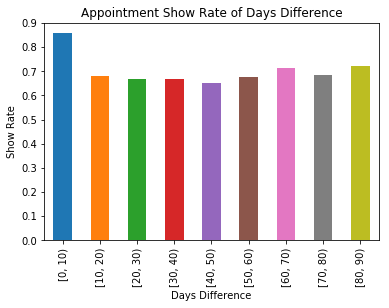

In [50]:
# Appointment Show Rate of Days Difference between Schedule and Appointment Dates

(1-df.groupby('date_diff_group').No_show.mean()).plot(kind='bar')
plt.title('Appointment Show Rate of Days Difference')
plt.xlabel('Days Difference')
plt.ylabel('Show Rate');

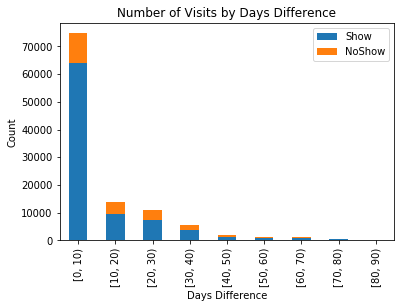

In [51]:
# Stacked bar chart on number of visits by day difference between schedule and appointment Dates

df.groupby(['date_diff_group','No_show'])['AppointmentID'].count().unstack().plot(kind='bar',stacked=True)
plt.ylabel('Count')
plt.xlabel('Days Difference')
plt.legend(['Show', 'NoShow'])
plt.title('Number of Visits by Days Difference');

> - From the above analysis, we could see show rate is obviously high for the group making appointments within 10 days. On the other hand, this group has the most people among all groups. 

### Age

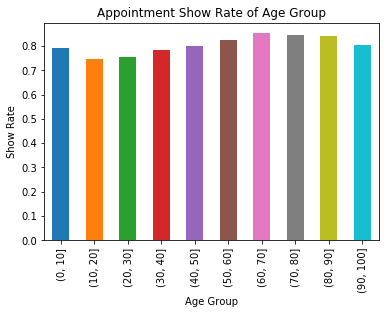

In [52]:
# Appointment Show Rate of Age Group

age_bin = [0,10,20,30,40,50,60,70,80,90,100]
df['age_group'] = pd.cut(df['Age'],age_bin)
(1-df.groupby('age_group').No_show.mean()).plot(kind='bar')
plt.title('Appointment Show Rate of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Show Rate');

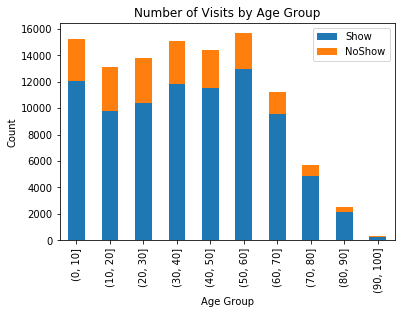

In [53]:
# Stacked bar chart on number of visits by age groups

df.groupby(['age_group','No_show'])['AppointmentID'].count().unstack().plot(kind='bar',stacked=True)
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(['Show', 'NoShow'])
plt.title('Number of Visits by Age Group');

> - From the above analysis, age 10-20 group has a relatively low show rate and then the show rate increases with age till 60-70 year old group. The amount of patients drops drastically after 60-70 year old group.

### Handicap Category

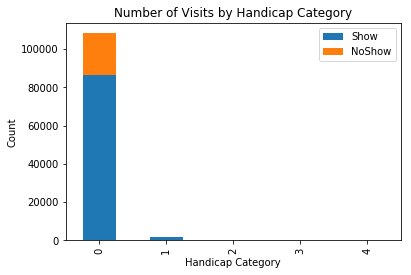

In [36]:
# Stacked bar chart on number of visits by handicap

df.groupby(['Handicap','No_show'])['AppointmentID'].count().unstack().plot(kind='bar',stacked=True)
plt.ylabel('Count')
plt.xlabel('Handicap Category')
plt.legend(['Show', 'NoShow'])
plt.title('Number of Visits by Handicap Category');

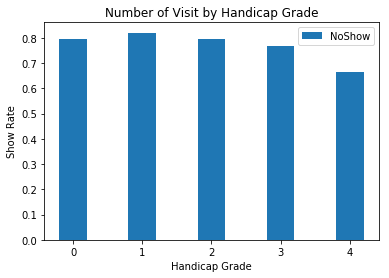

In [9]:
# bar chart on show rates of handicap categories

N = df.Handicap.nunique()
ind = np.arange(N)
width = 0.4 
Show_rate = 1 - df.groupby(['Handicap']).No_show.mean()

plt.bar(ind, Show_rate, width)
plt.legend(['NoShow'])
plt.title('Number of Visit by Handicap Grade')
plt.xlabel('Handicap Grade')
plt.ylabel('Show Rate')
plt.xticks(ind, ('0','1','2','3','4'));

> - In the two bar charts above, we may know that '0' stands for patients without handicap and '1-4' stands for different types of handicap. The show rates of handicap type 1-3 patients are not obviously different from that of no handicap patients. However, type 4 handicap patients has a 13% lower show rate compared to other patients.

### Diseases (Hipertension, Diabetes, Alcoholism)

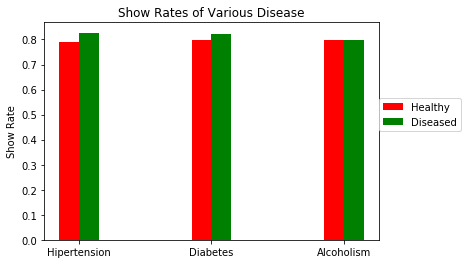

In [54]:
# Compare show rates of people with three chronic diseases

width = 0.15
xaxis = 0

for i in ['Hipertension','Diabetes','Alcoholism']:
    show_rate = 1 - df.groupby([i]).No_show.mean()
    bar1 = plt.bar(xaxis-width/2,show_rate[0],width,color='r')
    bar2 = plt.bar(xaxis+width/2,show_rate[1],width,color='g')
    xaxis+=1
    
plt.title('Show Rates of Various Disease')
plt.ylabel('Show Rate')
plt.xticks((0,1,2), ('Hipertension','Diabetes','Alcoholism'))
plt.legend((bar1, bar2),('Healthy','Diseased'),loc=(1.0,0.5));    
    

> - The above bar chart shows that people with hipertension and diabetes have slightly higher show rates compared to people without those diseases. For alcoholism, there is no obvious difference on show rate between diseased people and normal people.

### Gender

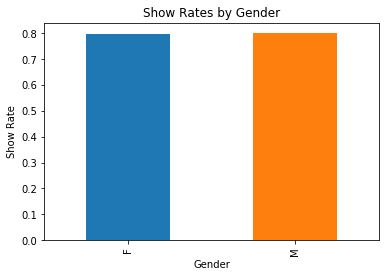

In [42]:
# Comparison of show rates by genders 

(1-df.groupby('Gender').No_show.mean()).plot(kind='bar')
plt.ylabel('Show Rate')
plt.title('Show Rates by Gender');

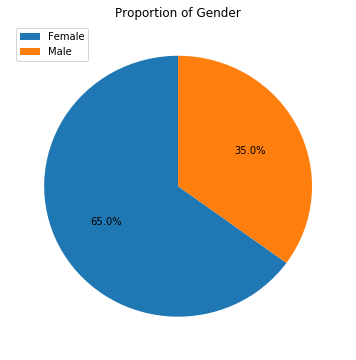

In [43]:
# Proportion of genders

df.groupby('Gender').Gender.count().plot(kind='pie',autopct='%.1f%%',title='Proportion of Gender', figsize=(6,6),labels=None)
plt.ylabel('')
plt.legend(['Female','Male']);

> - We may see there are almost twice as many female patients (65%) as male patients (35%) in the pie chart. No obvious difference on show rate between two genders can be found in the bar chart.

### SMS Received

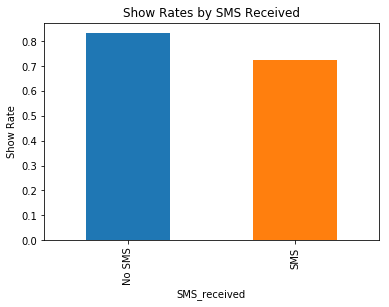

In [55]:
# Comparison of show rates by message receiving 

(1-df.groupby('SMS_received').No_show.mean()).plot(kind='bar')
plt.ylabel('Show Rate')
plt.title('Show Rates by SMS Received')
plt.xticks((0,1), ('No SMS','SMS'));

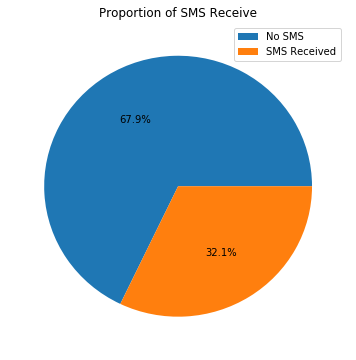

In [73]:
# Proportion of people receiving message (SMS Received)

df.groupby('SMS_received').SMS_received.count().plot(kind='pie', autopct='%.1f%%',title='Proportion of SMS Receive', figsize=(6,6),labels=None)
plt.ylabel('')
plt.legend(['No SMS','SMS Received']);

> - The pie chart shows there are around 1/3 of patients (32.1%) received messages on their appointments. However, the show rate of patients with SMS is about 11% lower compared to those without receiving SMS.

### Scholarship

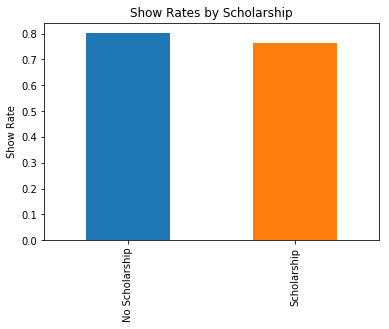

In [58]:
# Comparison of show rates by scholarship 

(1-df.groupby('Scholarship').No_show.mean()).plot(kind='bar')
plt.ylabel('Show Rate')
plt.title('Show Rates by Scholarship')
plt.xlabel('')
plt.xticks((0,1), ('No Scholarship','Scholarship'));

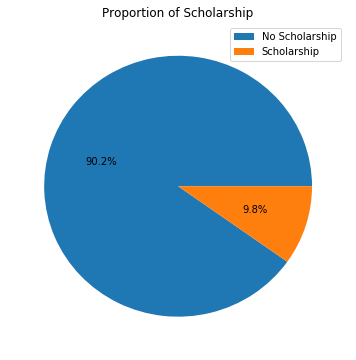

In [57]:
# Proportion of people receiving scholarship

df.groupby('Scholarship').Scholarship.count().plot(kind='pie', legend=False, title='Proportion of Scholarship', autopct='%.1f%%',figsize=(6,6),labels=None)
plt.ylabel('')
plt.legend(['No Scholarship','Scholarship']);

> - The pie chart shows around 10% of patients could be financially supported by scholarship. However, the patients with scholarship inversely has a lower show rate (4% lower than patients without scholarship). 

<a id='conclusions'></a>
## Conclusions
> - In this project, data exploration covers factors as days difference between schedule and appointments dates, age, handicap, common diseases(Hipertension, Diabetes, and Alcoholism), Gender, SMS receive, and scholarship. Show rates influenced by factors listed above were calculated and results were visualized in bar charts and pie charts. However, statistical tests were not carried out. Due to the limitation, no statistical conclusion was implied. Future work could be added by regression modeling and hyperthesis testing to identify the real reason for no show in appointment.  


In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0